In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 133kB/s 
     |████████████████████████████████| 6.8MB 55.0MB/s 
     |████████████████████████████████| 983kB 50.7MB/s 
     |████████████████████████████████| 266kB 43.6MB/s 
     |████████████████████████████████| 1.3MB 44.7MB/s 
     |████████████████████████████████| 1.2MB 54.3MB/s 
     |████████████████████████████████| 471kB 52.6MB/s 
     |████████████████████████████████| 890kB 54.5MB/s 
     |████████████████████████████████| 2.9MB 43.5MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.3-cp36-none-any.whl size=25276312 sha256=590d2c6dfb872c7460ff180ce8c9ba9b304cc4d81e4c708e38265142d9315849
  Stored in directory: /root/.cache/pip/wheels/86/cd/9c/ad53b98a3eccf4ddeddccfce99d353781f206a1ac4287ca721
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=1256ab996f51918378936ce46488123f2d2cd5f6a89088ff1ac3dd9ae5e360f5
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [ ]:
import ktrain
from ktrain import text
import pandas as pd
import numpy as np
from sklearn.utils import shuffle, resample

## Load the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
news = pd.read_excel("/content/drive/MyDrive/Masterarbeit/Crawler/data/FinalDataset/CleanData_FinalDataset_ForModel_V5.xlsx", index_col=0)

In [ ]:
# Get the same train and test data
def split_df_in_train_test(df):
    df = df.reset_index()
    split_point = int(np.round(df.shape[0]) * 0.8)
    df_train = df.loc[:split_point-1,:]
    df_test = df.loc[split_point:,:]
    return df_train, df_test

In [ ]:
n_samples = 6000

In [ ]:
left_FE = resample(shuffle(news[(news["label"]=="links") & (news.maintext.str.split().str.len()<512)], random_state=42), \
         random_state=42, n_samples=n_samples)
leanLeft_FE = resample(shuffle(news[(news["label"]=="halbLinks") & (news.maintext.str.split().str.len()<512)], random_state=42), \
         random_state=42, n_samples=n_samples)
center_FE = resample(shuffle(news[(news["label"]=="central") & (news.maintext.str.split().str.len()<512)], random_state=42), \
         random_state=42, n_samples=n_samples)
leanRight_FE = resample(shuffle(news[(news["label"]=="halbRechts") & (news.maintext.str.split().str.len()<512)], random_state=42), \
         random_state=42, n_samples=n_samples)
right_FE = resample(shuffle(news[(news["label"]=="rechts") & (news.maintext.str.split().str.len()<512)], random_state=42), \
         random_state=42, n_samples=n_samples)

In [ ]:
train = pd.concat([split_df_in_train_test(left_FE)[0], \
    split_df_in_train_test(leanLeft_FE)[0], \
    split_df_in_train_test(center_FE)[0], \
    split_df_in_train_test(leanRight_FE)[0], \
    split_df_in_train_test(right_FE)[0]])

In [ ]:
test =  pd.concat([split_df_in_train_test(left_FE)[1], \
    split_df_in_train_test(leanLeft_FE)[1], \
    split_df_in_train_test(center_FE)[1], \
    split_df_in_train_test(leanRight_FE)[1], \
    split_df_in_train_test(right_FE)[1]])

In [ ]:
x_train = train["maintext"].to_list()
y_train = train["label"].to_list()
x_test = test["maintext"].to_list()
y_test = test["label"].to_list()

In [ ]:
class_names = list(train["label"].unique())

## Build the model

In [ ]:
model_name = "bert-base-german-cased"

In [ ]:
t = text.Transformer(model_name, maxlen=512, classes= class_names)

/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:414: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


In [ ]:
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)

preprocessing train...
language: de
train sequence lengths:
	mean : 223
	95percentile : 470
	99percentile : 503


/usr/local/lib/python3.6/dist-packages/ktrain/utils.py:589: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: de
test sequence lengths:
	mean : 223
	95percentile : 471
	99percentile : 503


In [ ]:
trn.x

array([[[    3,  2280,  1733, ...,  4841,  9349,     4],
        [    1,     1,     1, ...,     1,     1,     1],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[    3,   173,   798, ...,  2239,   144,     4],
        [    1,     1,     1, ...,     1,     1,     1],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[    3,  2912, 26935, ...,     0,     0,     0],
        [    1,     1,     1, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       ...,

       [[    3,   233,  8581, ...,     0,     0,     0],
        [    1,     1,     1, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[    3,   346,  5837, ...,     0,     0,     0],
        [    1,     1,     1, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[    3,  2261,  4532, ...,     0,     0,     0],
        [    1,     1,     1, ...,     0,     0,     0],
        

In [ ]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [ ]:
model.loss

In [ ]:
learner.freeze()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
3000/3000 [==============================] - 656s 213ms/step - loss: 5.0037 - accuracy: 0.2684


done.
Visually inspect loss plot and select learning rate associated with falling loss


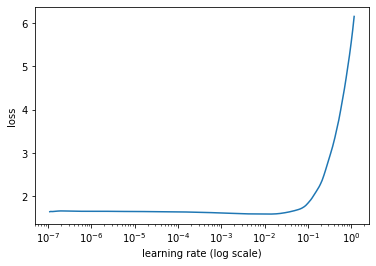

In [ ]:
learner.lr_find(show_plot=True)

In [ ]:
optimal_lr = learner.lr_estimate()[1]

In [ ]:
print(optimal_lr)

1.0099999769863644e-08


In [ ]:
learner.fit(0.00001, 7)

Epoch 1/7
3000/3000 [==============================] - 3359s 1s/step - loss: 0.9436 - accuracy: 0.6291 - val_loss: 0.3795 - val_accuracy: 0.8652
Epoch 2/7
3000/3000 [==============================] - 3343s 1s/step - loss: 0.2667 - accuracy: 0.9103 - val_loss: 0.2750 - val_accuracy: 0.9080
Epoch 3/7
3000/3000 [==============================] - 3343s 1s/step - loss: 0.1128 - accuracy: 0.9625 - val_loss: 0.2679 - val_accuracy: 0.9223
Epoch 4/7
3000/3000 [==============================] - 3340s 1s/step - loss: 0.0617 - accuracy: 0.9812 - val_loss: 0.3440 - val_accuracy: 0.9125
Epoch 5/7
3000/3000 [==============================] - 3343s 1s/step - loss: 0.0439 - accuracy: 0.9865 - val_loss: 0.3096 - val_accuracy: 0.9287
Epoch 6/7
3000/3000 [==============================] - 3344s 1s/step - loss: 0.0302 - accuracy: 0.9896 - val_loss: 0.3358 - val_accuracy: 0.9185
Epoch 7/7
3000/3000 [==============================] - 3342s 1s/step - loss: 0.0278 - accuracy: 0.9911 - val_loss: 0.3784 - val_ac

In [ ]:
learner.validate(class_names=class_names)

              precision    recall  f1-score   support

       links       0.92      0.91      0.91      1200
   halbLinks       0.91      0.96      0.93      1200
     central       0.88      0.87      0.88      1200
  halbRechts       0.94      0.94      0.94      1200
      rechts       0.95      0.91      0.93      1200

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



array([[1091,   16,   63,   20,   10],
       [  12, 1156,   15,    6,   11],
       [  48,   42, 1044,   34,   32],
       [  22,   14,   24, 1133,    7],
       [  15,   48,   36,   11, 1090]])